# Lab 6. Data Transformation.

## Tidy data is a framework to structure data sets so they can be easily analyzed and visualized. 

## What is tidy data? Hadley Wickham’s paper defines it as meeting the following criteria:
■ Each row is an observation.

■ Each column is a variable.

■ Each type of observational unit forms a table.

## This session will cover:

1. Unpivoting/melting/gathering columns into rows
2. Pivoting/casting/spreading rows into columns
3. Normalizing data by separating a dataframe into multiple tables
4. Assembling data from multiple parts

## 0. We need to upgrade pandas to the newest version

In [ ]:
!pip3 install --upgrade pandas

# 1. Let's load some libraries

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.2'

In [3]:
from matplotlib.pyplot import figure

In [4]:
import seaborn as sns

# 2. Let's load and concatenate some datasets

In [5]:
## The air_quality_no2_long.csv data set provides 𝑁𝑂2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.
air_quality_no2 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_no2_long.csv',parse_dates=True)

In [6]:
## The air_quality_pm25_long.csv data set provides 𝑃𝑀25 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

air_quality_pm25 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_pm25_long.csv',parse_dates=True)

In [7]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [8]:
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [9]:
air_quality_no2.sort_values(by='date.utc',ascending=True)

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...,...
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


In [10]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [11]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


# 3. From long to wide form Dataframes: Pivot operations 

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png">



In [12]:
air_quality_no2_pivoted=air_quality_no2.pivot(index='date.utc', columns='city', values='value')

In [13]:
air_quality_no2_pivoted

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,NaN,21.4
2019-06-20 21:00:00+00:00,NaN,NaN,24.9
2019-06-20 22:00:00+00:00,NaN,NaN,26.5


<Figure size 2880x2160 with 0 Axes>

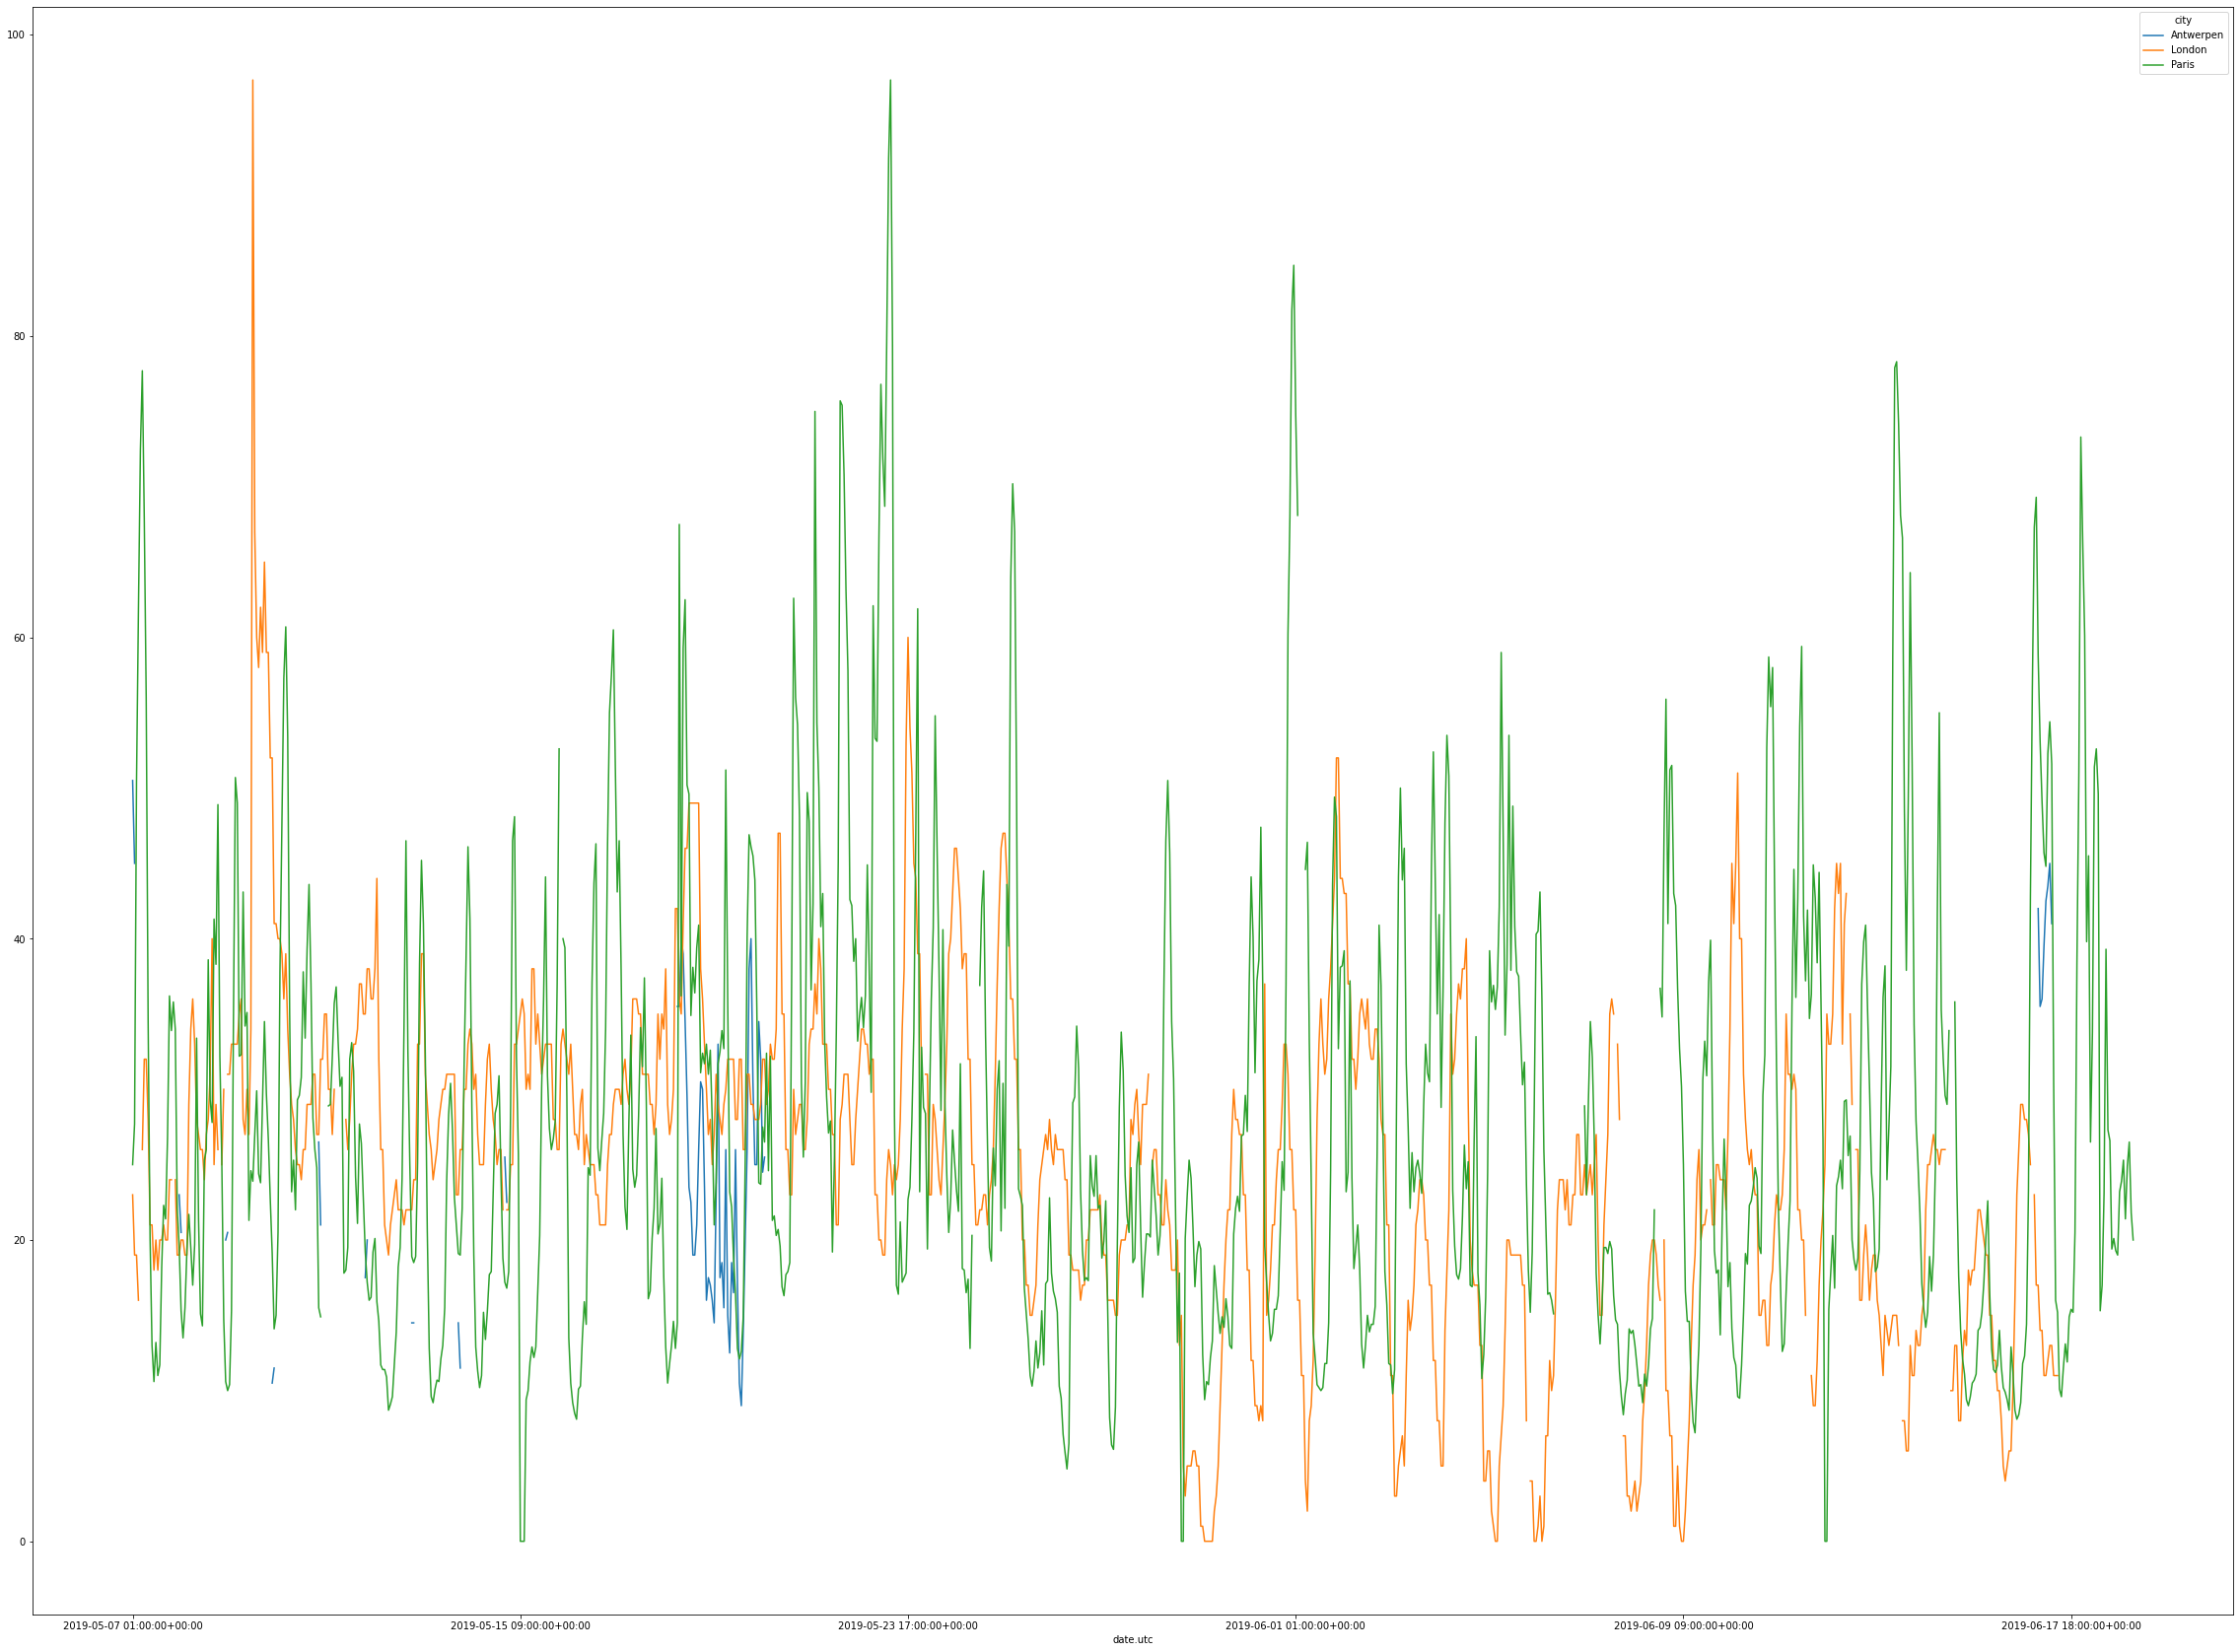

In [14]:
figure(figsize=(40,30))
air_quality_no2_pivoted.plot(figsize=(40,30))

In [15]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [16]:
air_quality_pivoted=air_quality.pivot_table(
        values='value', 
        index=['city', 'date.utc','country','location'], 
        columns='parameter')

In [17]:
air_quality_pivoted

parameter                                              no2  pm25
city      date.utc                  country location            
Antwerpen 2019-05-07 01:00:00+00:00 BE      BETR801   50.5  12.5
          2019-05-07 02:00:00+00:00 BE      BETR801   45.0  14.0
          2019-05-08 01:00:00+00:00 BE      BETR801   23.0  14.5
          2019-05-08 02:00:00+00:00 BE      BETR801   20.5  14.0
          2019-05-09 01:00:00+00:00 BE      BETR801   20.0   4.5
...                                                    ...   ...
Paris     2019-06-20 20:00:00+00:00 FR      FR04014   21.4   NaN
          2019-06-20 21:00:00+00:00 FR      FR04014   24.9   NaN
          2019-06-20 22:00:00+00:00 FR      FR04014   26.5   NaN
          2019-06-20 23:00:00+00:00 FR      FR04014   21.8   NaN
          2019-06-21 00:00:00+00:00 FR      FR04014   20.0   NaN

[2117 rows x 2 columns]

# 4. From wide to long form: Melt operations

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

In [18]:
air_quality_no2_pivoted.head()

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4


In [19]:
# we need to extract the index to a new column
air_quality_no2_pivoted.reset_index( inplace=True)

In [20]:
air_quality_no2_pivoted

city,date.utc,Antwerpen,London,Paris
0,2019-05-07 01:00:00+00:00,50.5,23.0,25.0
1,2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2,2019-05-07 03:00:00+00:00,NaN,19.0,50.4
3,2019-05-07 04:00:00+00:00,NaN,16.0,61.9
4,2019-05-07 05:00:00+00:00,NaN,NaN,72.4
...,...,...,...,...
1028,2019-06-20 20:00:00+00:00,NaN,NaN,21.4
1029,2019-06-20 21:00:00+00:00,NaN,NaN,24.9
1030,2019-06-20 22:00:00+00:00,NaN,NaN,26.5
1031,2019-06-20 23:00:00+00:00,NaN,NaN,21.8


In [21]:
air_quality_no2_pivoted_melted=air_quality_no2_pivoted.melt(id_vars=['date.utc'])

In [22]:
air_quality_no2_pivoted_melted

,date.utc,city,value
0,2019-05-07 01:00:00+00:00,Antwerpen,50.5
1,2019-05-07 02:00:00+00:00,Antwerpen,45.0
2,2019-05-07 03:00:00+00:00,Antwerpen,NaN
3,2019-05-07 04:00:00+00:00,Antwerpen,NaN
4,2019-05-07 05:00:00+00:00,Antwerpen,NaN
...,...,...,...
3094,2019-06-20 20:00:00+00:00,Paris,21.4
3095,2019-06-20 21:00:00+00:00,Paris,24.9
3096,2019-06-20 22:00:00+00:00,Paris,26.5
3097,2019-06-20 23:00:00+00:00,Paris,21.8


## The previous format is it usually known as the "long form", it is usually the one required for most libraries in Python

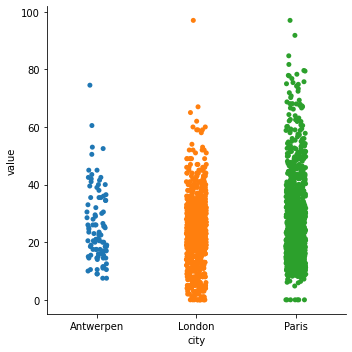

In [23]:
sns.catplot(x="city", y="value", data=air_quality_no2_pivoted_melted);

In [24]:
air_quality_pivoted.head()

parameter                                              no2  pm25
city      date.utc                  country location            
Antwerpen 2019-05-07 01:00:00+00:00 BE      BETR801   50.5  12.5
          2019-05-07 02:00:00+00:00 BE      BETR801   45.0  14.0
          2019-05-08 01:00:00+00:00 BE      BETR801   23.0  14.5
          2019-05-08 02:00:00+00:00 BE      BETR801   20.5  14.0
          2019-05-09 01:00:00+00:00 BE      BETR801   20.0   4.5

In [25]:
air_quality_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2117 entries, ('Antwerpen', '2019-05-07 01:00:00+00:00', 'BE', 'BETR801') to ('Paris', '2019-06-21 00:00:00+00:00', 'FR', 'FR04014')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no2     2068 non-null   float64
 1   pm25    1110 non-null   float64
dtypes: float64(2)
memory usage: 52.0+ KB


In [27]:
air_quality_pivoted.reset_index(inplace=True)

In [50]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [49]:
air_quality_melted=air_quality.melt(id_vars=['city','country','date.utc','location','parameter','unit'],value_vars=['value'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


In [52]:
air_quality_melted.head()

,city,country,date.utc,location,parameter,unit,variable,value
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,µg/m³,value,18.0
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,µg/m³,value,6.5
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,µg/m³,value,18.5
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,µg/m³,value,16.0
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,µg/m³,value,7.5


## 5. Groupby operation
### Probably the most used operation in data science !!!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [36]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


### 5.1. We group by a single column then we count 

In [37]:
air_quality.groupby('city').count()

,country,date.utc,location,parameter,value,unit
city,,,,,,
Antwerpen,196,196,196,196,196,196
London,1978,1978,1978,1978,1978,1978
Paris,1004,1004,1004,1004,1004,1004


In [38]:
air_quality.groupby('country').count()

,city,date.utc,location,parameter,value,unit
country,,,,,,
BE,196,196,196,196,196,196
FR,1004,1004,1004,1004,1004,1004
GB,1978,1978,1978,1978,1978,1978


In [39]:
air_quality.groupby('parameter').count()

,city,country,date.utc,location,value,unit
parameter,,,,,,
no2,2068,2068,2068,2068,2068,2068
pm25,1110,1110,1110,1110,1110,1110


### 5.2. We group by two columns then we count 

In [40]:
air_quality.groupby(['city','parameter']).count()

country  date.utc  location  value  unit
city      parameter                                          
Antwerpen no2             95        95        95     95    95
          pm25           101       101       101    101   101
London    no2            969       969       969    969   969
          pm25          1009      1009      1009   1009  1009
Paris     no2           1004      1004      1004   1004  1004

### 5.3. We group by several column then apply some functions

In [41]:
air_quality.groupby(['city','parameter']).mean()

value
city      parameter           
Antwerpen no2        25.778947
          pm25       21.504950
London    no2        24.777090
          pm25        8.993062
Paris     no2        27.740538

In [42]:
air_quality.groupby(['city','parameter']).max()

country                   date.utc            location  \
city      parameter                                                          
Antwerpen no2            BE  2019-06-17 08:00:00+00:00             BETR801   
          pm25           BE  2019-06-18 06:00:00+00:00             BETR801   
London    no2            GB  2019-06-17 11:00:00+00:00  London Westminster   
          pm25           GB  2019-06-21 00:00:00+00:00  London Westminster   
Paris     no2            FR  2019-06-21 00:00:00+00:00             FR04014   

                     value   unit  
city      parameter                
Antwerpen no2         74.5  µg/m³  
          pm25        60.0  µg/m³  
London    no2         97.0  µg/m³  
          pm25        20.0  µg/m³  
Paris     no2         97.0  µg/m³

In [43]:
air_quality.groupby(['city','parameter']).min()

country                   date.utc            location  \
city      parameter                                                          
Antwerpen no2            BE  2019-05-07 01:00:00+00:00             BETR801   
          pm25           BE  2019-05-07 01:00:00+00:00             BETR801   
London    no2            GB  2019-05-07 01:00:00+00:00  London Westminster   
          pm25           GB  2019-05-07 01:00:00+00:00  London Westminster   
Paris     no2            FR  2019-05-07 01:00:00+00:00             FR04014   

                     value   unit  
city      parameter                
Antwerpen no2          7.5  µg/m³  
          pm25         3.0  µg/m³  
London    no2          0.0  µg/m³  
          pm25         5.0  µg/m³  
Paris     no2          0.0  µg/m³

In [44]:
air_quality.groupby(['city','location','parameter']).mean()

value
city      location           parameter           
Antwerpen BETR801            no2        25.778947
                             pm25       21.504950
London    London Westminster no2        24.777090
                             pm25        8.993062
Paris     FR04014            no2        27.740538

In [45]:
air_quality.groupby(['city','date.utc','parameter']).mean()

value
city      date.utc                  parameter       
Antwerpen 2019-05-07 01:00:00+00:00 no2         50.5
                                    pm25        12.5
          2019-05-07 02:00:00+00:00 no2         45.0
                                    pm25        14.0
          2019-05-08 01:00:00+00:00 no2         23.0
...                                              ...
Paris     2019-06-20 20:00:00+00:00 no2         21.4
          2019-06-20 21:00:00+00:00 no2         24.9
          2019-06-20 22:00:00+00:00 no2         26.5
          2019-06-20 23:00:00+00:00 no2         21.8
          2019-06-21 00:00:00+00:00 no2         20.0

[3178 rows x 1 columns]

## 6. Groupby on temporal data 

## This is usefuly  for instance to find the means of pollution values on a monthly basis

In [71]:
air_quality.head()

,city,country,location,parameter,value,unit,date_formatted
0,Antwerpen,BE,BETR801,pm25,18.0,µg/m³,2019-06-18 06:00:00+00:00
1,Antwerpen,BE,BETR801,pm25,6.5,µg/m³,2019-06-17 08:00:00+00:00
2,Antwerpen,BE,BETR801,pm25,18.5,µg/m³,2019-06-17 07:00:00+00:00
3,Antwerpen,BE,BETR801,pm25,16.0,µg/m³,2019-06-17 06:00:00+00:00
4,Antwerpen,BE,BETR801,pm25,7.5,µg/m³,2019-06-17 05:00:00+00:00


In [61]:
## Let's cast date.utc to datetime 

In [62]:
air_quality['date_formatted']=pd.to_datetime(air_quality['date.utc'])

In [69]:
air_quality.drop('date.utc',inplace=True,axis=1)

In [74]:
air_quality_daily=air_quality.groupby(['city','country','location','parameter','unit',pd.Grouper(key='date_formatted',freq='1D')]).mean()

In [75]:
air_quality_daily

value
city      country location parameter unit  date_formatted                      
Antwerpen BE      BETR801  no2       µg/m³ 2019-05-07 00:00:00+00:00  47.750000
                                           2019-05-08 00:00:00+00:00  21.750000
                                           2019-05-09 00:00:00+00:00  20.250000
                                           2019-05-10 00:00:00+00:00  11.000000
                                           2019-05-11 00:00:00+00:00  23.750000
...                                                                         ...
Paris     FR      FR04014  no2       µg/m³ 2019-06-17 00:00:00+00:00  34.395833
                                           2019-06-18 00:00:00+00:00  40.015385
                                           2019-06-19 00:00:00+00:00  26.950000
                                           2019-06-20 00:00:00+00:00  22.254545
                                           2019-06-21 00:00:00+00:00  20.000000

[211 rows x 1 columns]

In [77]:
air_quality_daily.reset_index(inplace=True)

In [78]:
air_quality_daily

,city,country,location,parameter,unit,date_formatted,value
0,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-07 00:00:00+00:00,47.750000
1,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-08 00:00:00+00:00,21.750000
2,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-09 00:00:00+00:00,20.250000
3,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-10 00:00:00+00:00,11.000000
4,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-11 00:00:00+00:00,23.750000
...,...,...,...,...,...,...,...
206,Paris,FR,FR04014,no2,µg/m³,2019-06-17 00:00:00+00:00,34.395833
207,Paris,FR,FR04014,no2,µg/m³,2019-06-18 00:00:00+00:00,40.015385
208,Paris,FR,FR04014,no2,µg/m³,2019-06-19 00:00:00+00:00,26.950000
209,Paris,FR,FR04014,no2,µg/m³,2019-06-20 00:00:00+00:00,22.254545


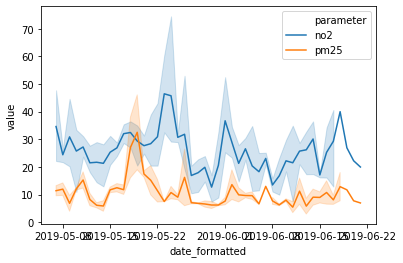

In [84]:
sns.lineplot(data = air_quality_daily,x="date_formatted", y="value", hue='parameter')